<a href="https://colab.research.google.com/github/ssahu912/caddy-gesture-identification/blob/main/caddy_gestures_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1FdIwG5tk-mNrei-SVpC6SEbi9VAhL-pY')

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
project_name='caddy-gestures-course-project'

# Exploring CADDY Underwater Gestures Dataset
### Human-Robot Interaction (HRI) for Diver and AUVs activities
This is an open access dataset distributed under the Creative Commons Attribution License which permits unrestricted use, distribution, and reproduction in any medium, provided the original work is properly cited (CC BY 4.0).
<p>
The dataset can be downloaded from the <a href="http://www.caddian.eu//assets/caddy-gestures-TMP/CADDY_gestures_complete_v2_release.zip">link</a>.
<p>
Choosing this dataset of hand gestures used by divers underwater to provide instructtions in 8 different scenarios. The scenarios involved in this dataset are as follows: 
<table><tr>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/biograd-A/true_positives/raw/biograd-A_00162_left.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/biograd-B/true_positives/raw/biograd-B_00032_right.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/biograd-C/true_positives/raw/biograd-C_00098_right.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/brodarski-A/true_positives/raw/brodarski-A_00018_right.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr>
<td>BioGrad-A</td>
<td>BioGrad-B</td>
<td>BioGrad-C</td>
<td>Brodarski-A</td>
</tr>
<tr>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/brodarski-B/true_positives/raw/brodarski-B_00029_right.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/brodarski-C/true_positives/raw/brodarski-C_00006_left.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/brodarski-D/true_positives/raw/brodarski-D_00032_right.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/genova-A/true_positives/raw/genova-A_00032_right.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr>
</tr>
<td>Brodarski-B</td>
<td>Brodarski-C</td>
<td>Brodarski-D</td>
<td>Genova-A</td>
</tr>
</table>
It is a classification type problem where given an image of the person with the gesture the machine will identify the gesture meaning in multiple scenarios.


If you wish to upload the data on the drive then use this code to mount the drive so that it is available to use.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import torch
import torchvision
import zipfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

If you wish to download the data set and load it while running the notebook and do not want ot upload it to your drive please uncomment the below cell and execute. 

In [6]:
# # Dowload the dataset
dataset_url = "http://www.caddian.eu//assets/caddy-gestures-TMP/CADDY_gestures_complete_v2_release.zip"
# download_url(dataset_url, '.')
# # Extract from downloaded archive
# with zipfile.ZipFile('./CADDY_gestures_complete_v2_release.zip', 'r') as zip_ref:
#     zip_ref.extractall('./data')

In [ ]:
# Extract from drive archive
with zipfile.ZipFile('./drive/MyDrive/CADDY_gestures_complete_v2_release.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

## Data Analysis

Let's explore the data!

Looking at the folder structure we see that we have 8 folders for 8 scenarios which contain raw images of multiple gestures captured by the left and right stereo.
<p>
The folder structure of the data is something like this:
<p>
data => biograd-A => true_positives => raw => image1, image2 ... imageN

Let's take a look what's inside the the csv files and how are they structured!!
(We'll be looking at the true positives only for the scope of the project.)

In [7]:
# Importing required EDA tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
dataFromCSV = pd.read_csv('./data/CADDY_gestures_complete_v2_release/CADDY_gestures_all_true_positives_release_v2.csv', index_col='index')
dataFromCSV.head(10)

,scenario,stereo left,stereo right,label name,label id,roi left,roi right,synthetic,iqa_mdm_entropy,iqa_mdm_d,iqa_mdm_dcomp,distortion,param 1,param 2
index,,,,,,,,,,,,,,
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",0,6.971026,0.957653,0.902,NaN,NaN,NaN
1,biograd-A,/biograd-A/true_positives/blurred/dir_00/biogr...,/biograd-A/true_positives/blurred/dir_00/biogr...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,blur,7,NaN
2,biograd-A,/biograd-A/true_positives/blurred/dir_01/biogr...,/biograd-A/true_positives/blurred/dir_01/biogr...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,blur,11,NaN
3,biograd-A,/biograd-A/true_positives/blurred/dir_02/biogr...,/biograd-A/true_positives/blurred/dir_02/biogr...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,blur,15,NaN
4,biograd-A,/biograd-A/true_positives/noisy/dir_00/biograd...,/biograd-A/true_positives/noisy/dir_00/biograd...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,channel noise,5,NaN
5,biograd-A,/biograd-A/true_positives/noisy/dir_01/biograd...,/biograd-A/true_positives/noisy/dir_01/biograd...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,channel noise,10,NaN
6,biograd-A,/biograd-A/true_positives/low_contrast/dir_00/...,/biograd-A/true_positives/low_contrast/dir_00/...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,low contrast,0.8,NaN
7,biograd-A,/biograd-A/true_positives/low_contrast/dir_01/...,/biograd-A/true_positives/low_contrast/dir_01/...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,low contrast,0.6,NaN
8,biograd-A,/biograd-A/true_positives/compressed/dir_00/bi...,/biograd-A/true_positives/compressed/dir_00/bi...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,compression,jpeg,80.0


In [9]:
dataFromCSV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92390 entries, 0 to 92389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   scenario         92390 non-null  object 
 1   stereo left      92390 non-null  object 
 2   stereo right     92390 non-null  object 
 3   label name       92390 non-null  object 
 4   label id         92390 non-null  int64  
 5   roi left         91790 non-null  object 
 6   roi right        91440 non-null  object 
 7   synthetic        92390 non-null  int64  
 8   iqa_mdm_entropy  9239 non-null   float64
 9   iqa_mdm_d        9239 non-null   float64
 10  iqa_mdm_dcomp    9239 non-null   float64
 11  distortion       83151 non-null  object 
 12  param 1          83151 non-null  object 
 13  param 2          18478 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 10.6+ MB


In [10]:
dataFromCSV.columns

Index(['scenario', 'stereo left', 'stereo right', 'label name', 'label id',
       'roi left', 'roi right', 'synthetic', 'iqa_mdm_entropy', 'iqa_mdm_d',
       'iqa_mdm_dcomp', 'distortion', 'param 1', 'param 2'],
      dtype='object')

For the scope of the project where we are classifying the gestures we would only need the label name of the the image from the CSV.
<p>
Also a point worth noting is not all the images are present in the data set as mentioned in CSV. If we look closely inside each and every scenario there are 2 folders "true_positives" and "true_neagtives", and inside each of them there's only one folder called "raw". This means that only raw images are present and not the distorted ones.
<p>
Hence we'll be working on the raw set of images which are around 18,400 which is a pretty decent data size.

Let's idenetify how many different gestures are available in the dataset.

In [11]:
classes = dataFromCSV["label name"].unique()
classes

array(['num_delimiter', 'five', 'end_comm', 'start_comm', 'one', 'two',
       'three', 'four', 'up', 'down', 'backwards', 'mosaic', 'boat',
       'carry', 'here', 'photo'], dtype=object)

In [12]:
len(classes)

16

We see that we have 16 unique classes hence we have to categorize the images into 16 classes.(output)

### Data Cleaning 

As we saw earlier we have a lot of missing and junk data which we need to filter out, or we can say we need to extract the useful data from the CSV and map them with the images.
<p>
So let's create another CSV which can help map the raw data image paths with their labels.


In [13]:
# removing distorted image data from csv
dataset = dataFromCSV.loc[dataFromCSV.distortion.isnull()]
dataset.head()

,scenario,stereo left,stereo right,label name,label id,roi left,roi right,synthetic,iqa_mdm_entropy,iqa_mdm_d,iqa_mdm_dcomp,distortion,param 1,param 2
index,,,,,,,,,,,,,,
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",0,6.971026,0.957653,0.902000,NaN,NaN,NaN
10,biograd-A,/biograd-A/true_positives/raw/biograd-A_00001_...,/biograd-A/true_positives/raw/biograd-A_00001_...,num_delimiter,10,"[230,230,61,79]","[147,230,61,79]",0,6.977803,0.958442,0.885512,NaN,NaN,NaN
20,biograd-A,/biograd-A/true_positives/raw/biograd-A_00002_...,/biograd-A/true_positives/raw/biograd-A_00002_...,num_delimiter,10,"[222,230,72,75]","[139,230,72,75]",0,6.930135,0.958565,0.885733,NaN,NaN,NaN
30,biograd-A,/biograd-A/true_positives/raw/biograd-A_00003_...,/biograd-A/true_positives/raw/biograd-A_00003_...,num_delimiter,10,"[231,231,62,83]","[148,231,62,83]",0,6.948746,0.958243,0.885593,NaN,NaN,NaN
40,biograd-A,/biograd-A/true_positives/raw/biograd-A_00004_...,/biograd-A/true_positives/raw/biograd-A_00004_...,num_delimiter,10,"[222,219,70,76]","[138,219,70,76]",0,7.175039,0.955913,0.875217,NaN,NaN,NaN


In [14]:
# removing irrelevant columns from the data
dataset = dataset.drop(labels=['roi left', 'roi right', 'synthetic', 'iqa_mdm_entropy', 'iqa_mdm_d',
                                   'iqa_mdm_dcomp', 'distortion', 'param 1', 'param 2'], axis=1)
dataset.head()

,scenario,stereo left,stereo right,label name,label id
index,,,,,
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10
10,biograd-A,/biograd-A/true_positives/raw/biograd-A_00001_...,/biograd-A/true_positives/raw/biograd-A_00001_...,num_delimiter,10
20,biograd-A,/biograd-A/true_positives/raw/biograd-A_00002_...,/biograd-A/true_positives/raw/biograd-A_00002_...,num_delimiter,10
30,biograd-A,/biograd-A/true_positives/raw/biograd-A_00003_...,/biograd-A/true_positives/raw/biograd-A_00003_...,num_delimiter,10
40,biograd-A,/biograd-A/true_positives/raw/biograd-A_00004_...,/biograd-A/true_positives/raw/biograd-A_00004_...,num_delimiter,10


Since we have images from 2 stereos left and right which have almost similar image we would like to negate the difference between the left and right stereo. Hence altering the CSV to increase the size of Dataset.

In [15]:
dataset_right_stereo = dataset.drop(labels = ["stereo left"],axis=1)
dataset_right_stereo.rename(columns = {"stereo right": 'stereo'}, inplace = True)
dataset_right_stereo

,scenario,stereo,label name,label id
index,,,,
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10
10,biograd-A,/biograd-A/true_positives/raw/biograd-A_00001_...,num_delimiter,10
20,biograd-A,/biograd-A/true_positives/raw/biograd-A_00002_...,num_delimiter,10
30,biograd-A,/biograd-A/true_positives/raw/biograd-A_00003_...,num_delimiter,10
40,biograd-A,/biograd-A/true_positives/raw/biograd-A_00004_...,num_delimiter,10
...,...,...,...,...
92340,genova-A,/genova-A/true_positives/raw/genova-A_03315_ri...,end_comm,1
92350,genova-A,/genova-A/true_positives/raw/genova-A_03316_ri...,end_comm,1
92360,genova-A,/genova-A/true_positives/raw/genova-A_03317_ri...,end_comm,1


In [16]:
dataset_left_stereo = dataset.drop(labels = ["stereo right"],axis=1)
dataset_left_stereo.rename(columns = {"stereo left": 'stereo'}, inplace = True)
dataset_left_stereo

,scenario,stereo,label name,label id
index,,,,
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10
10,biograd-A,/biograd-A/true_positives/raw/biograd-A_00001_...,num_delimiter,10
20,biograd-A,/biograd-A/true_positives/raw/biograd-A_00002_...,num_delimiter,10
30,biograd-A,/biograd-A/true_positives/raw/biograd-A_00003_...,num_delimiter,10
40,biograd-A,/biograd-A/true_positives/raw/biograd-A_00004_...,num_delimiter,10
...,...,...,...,...
92340,genova-A,/genova-A/true_positives/raw/genova-A_03315_le...,end_comm,1
92350,genova-A,/genova-A/true_positives/raw/genova-A_03316_le...,end_comm,1
92360,genova-A,/genova-A/true_positives/raw/genova-A_03317_le...,end_comm,1


In [17]:
# Concatenate the two dataframes created above 
dataset_v1 = pd.concat([dataset_left_stereo,dataset_right_stereo], ignore_index=True)
dataset_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18478 entries, 0 to 18477
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   scenario    18478 non-null  object
 1   stereo      18478 non-null  object
 2   label name  18478 non-null  object
 3   label id    18478 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 577.6+ KB


In [18]:
dataset_v1.head()

,scenario,stereo,label name,label id
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10
1,biograd-A,/biograd-A/true_positives/raw/biograd-A_00001_...,num_delimiter,10
2,biograd-A,/biograd-A/true_positives/raw/biograd-A_00002_...,num_delimiter,10
3,biograd-A,/biograd-A/true_positives/raw/biograd-A_00003_...,num_delimiter,10
4,biograd-A,/biograd-A/true_positives/raw/biograd-A_00004_...,num_delimiter,10


As we can see in the output of the above cell we can say that the stereo column contains the path to image and the label name contains the information of the gesture performed.
<p>
So let's rename the stereo column to imagePath

In [19]:
dataset_v1.rename(columns={"stereo":"imagePath"},inplace=True)
dataset_v1

,scenario,imagePath,label name,label id
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10
1,biograd-A,/biograd-A/true_positives/raw/biograd-A_00001_...,num_delimiter,10
2,biograd-A,/biograd-A/true_positives/raw/biograd-A_00002_...,num_delimiter,10
3,biograd-A,/biograd-A/true_positives/raw/biograd-A_00003_...,num_delimiter,10
4,biograd-A,/biograd-A/true_positives/raw/biograd-A_00004_...,num_delimiter,10
...,...,...,...,...
18473,genova-A,/genova-A/true_positives/raw/genova-A_03315_ri...,end_comm,1
18474,genova-A,/genova-A/true_positives/raw/genova-A_03316_ri...,end_comm,1
18475,genova-A,/genova-A/true_positives/raw/genova-A_03317_ri...,end_comm,1
18476,genova-A,/genova-A/true_positives/raw/genova-A_03318_ri...,end_comm,1


In [20]:
classes = dataset_v1.filter(items=["label name","label id"])
classes = classes.set_index('label id').to_dict('dict')
classes = classes['label name']
classes

{0: 'start_comm',
 1: 'end_comm',
 2: 'up',
 3: 'down',
 4: 'photo',
 5: 'backwards',
 6: 'carry',
 7: 'boat',
 8: 'here',
 9: 'mosaic',
 10: 'num_delimiter',
 11: 'one',
 12: 'two',
 13: 'three',
 14: 'four',
 15: 'five'}

Saving dataset to CSV to use in future.

In [21]:
dataset_v1.to_csv("./drive/MyDrive/Colab Notebooks/caddy-gesture-transformedV1.csv")

In [22]:
!pip install jovian --upgrade --quiet

In [23]:
import jovian

In [24]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/shubham912sahu/caddy-gestures-course-project


'https://jovian.ai/shubham912sahu/caddy-gestures-course-project'

### Data Refactoring

As the data in the folder is not in the correct way we cannot use `ImageFolder` class and hence need to define a custom class extending the <a href="https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset">`Dataset`</a> class of `pytorch.utils.data`.
This class when 

In [176]:
from PIL import Image
from torchvision import transforms
from torchvision.transforms import ToTensor, Resize
import torch.nn.functional as F
import numpy as np
import random
import io
import os
import pandas as pd
from torch.utils.data import Dataset


class CaddyDataset(Dataset):
    def __init__(self, csv_path, img_dir='./data/CADDY_gestures_complete_v2_release', transform=ToTensor()):
        """
        Initialize data set as a list of IDs corresponding to each item of data set

        :param img_dir: path to image files as a folder
        :param csv_path: a text file containing names of all of images line by line
        :param transform: apply some transforms like cropping, rotating, etc on input image
        """

        df = pd.read_csv(csv_path)
        self.img_names = df["imagePath"].values
        self.labels = df["label id"].values
        self.csv_path = csv_path
        self.img_dir = img_dir
        self.transform = transform
        self.get_image_selector = False

    def get_image_from_folder(self, name):
        """
        gets a image by a name gathered from file list text file

        :param name: name of targeted image
        :return: a PIL image
        """
        image = Image.open(os.path.join(self.img_dir, name[1:]))
        
        return image

    def __len__(self):
        """
        Return the length of data set using list of IDs

        :return: number of samples in data set
        """
        return len(self.img_names)

    def __getitem__(self, index):
        """
        Generate one item of data set.

        :param index: index of item in IDs list

        :return: a sample of data as a dict
        """
        X = self.get_image_from_folder(self.img_names[index])

        # Get you label here using available pandas functions
        Y = self.labels[index]

        if self.transform is not None:
            p =transforms.Compose([transforms.Resize((32,32))])
            X = p(X)
            X = self.transform(X)
            

#            Y = self.transform(Y) # if your label is image too - remove if it is number

        sample = (X,Y)

        return sample

In [177]:
tensor_dataset = CaddyDataset("./drive/MyDrive/Colab Notebooks/caddy-gesture-transformedV1.csv",
                              img_dir='./data/CADDY_gestures_complete_v2_release',
                              transform=ToTensor())
tensor_dataset[2]

(tensor([[[0.2392, 0.2431, 0.2471,  ..., 0.1255, 0.1176, 0.1098],
          [0.2392, 0.2431, 0.2471,  ..., 0.1294, 0.1176, 0.1098],
          [0.2392, 0.2471, 0.2471,  ..., 0.1294, 0.1216, 0.1098],
          ...,
          [0.1098, 0.1137, 0.1176,  ..., 0.0863, 0.0824, 0.0824],
          [0.1098, 0.1137, 0.1176,  ..., 0.0902, 0.0863, 0.0824],
          [0.1059, 0.1098, 0.1176,  ..., 0.0902, 0.0863, 0.0824]],
 
         [[0.5647, 0.5804, 0.5961,  ..., 0.3843, 0.3608, 0.3373],
          [0.5765, 0.5922, 0.6078,  ..., 0.3922, 0.3647, 0.3412],
          [0.5804, 0.6000, 0.6118,  ..., 0.3961, 0.3725, 0.3451],
          ...,
          [0.3412, 0.3451, 0.3647,  ..., 0.3176, 0.3020, 0.2980],
          [0.3216, 0.3373, 0.3569,  ..., 0.3176, 0.2980, 0.2902],
          [0.3098, 0.3294, 0.3529,  ..., 0.3059, 0.2980, 0.2863]],
 
         [[0.8431, 0.8667, 0.8902,  ..., 0.6000, 0.5647, 0.5294],
          [0.8627, 0.8902, 0.9137,  ..., 0.6157, 0.5725, 0.5373],
          [0.8745, 0.9020, 0.9216,  ...,

In [178]:
img,label = tensor_dataset[0]
img.shape

torch.Size([3, 32, 32])

In [179]:
# def data_seperator(tensor_data):
#   img = tensor_data["Image"]
#   label = tensor_data["Label"]
#   return {img, label}

In [180]:
# print(data_seperator(tensor_dataset[0]))

In [181]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [182]:
def show_example(img, lable):
    print('Label: ', classes[lable], "("+str(lable)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  num_delimiter (10)


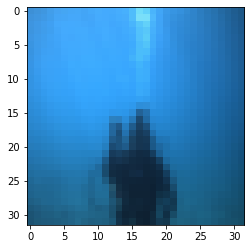

In [183]:
show_example(*tensor_dataset[0])

## Data Segregation 
Creating Validation, Testing and Training Datasets

For this scenario I would like to keep the ratio of the Datasets to be:
* Validation : 15%
* Testing : 15%
* Training : 70%

As we saw the dataset is not shuffled hence we need to shuffle the dataset first and then proceed with the segregation.




In [184]:
random_seed = 42
torch.manual_seed(random_seed);

In [185]:
val_size = len(tensor_dataset)*15//100
test_size = val_size
training_size = len(tensor_dataset)-val_size - test_size
train_ds, val_ds, test_ds = random_split(tensor_dataset, [training_size, val_size, test_size])
len(train_ds), len(val_ds), len(test_ds)

(12936, 2771, 2771)

In [186]:
jovian.log_dataset(dataset_url=dataset_url, val_size=val_size, random_seed=random_seed)

[jovian] Dataset logged.


In [187]:
img ,label = val_ds[0]
img.shape

torch.Size([3, 32, 32])

Now we create data loaders for training and validation so that the data can be loaded in batches.

In [188]:
from torch.utils.data.dataloader import DataLoader

batch_size=32

In [189]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [190]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

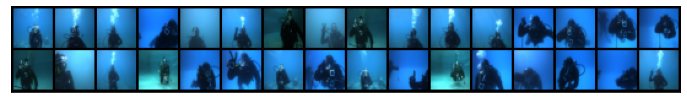

In [191]:
show_batch(train_dl)

In [192]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/shubham912sahu/caddy-gestures-course-project


'https://jovian.ai/shubham912sahu/caddy-gestures-course-project'

## Defining the Model (Convolutional Neural Network)
 Defining a multi layered Convolutional model.
 <p>
 Let's define the model by extending an `ImageClassificationBase` class which contains helper methods for training & validation.

In [193]:
import torch.nn as nn
import torch.nn.functional as F

In [194]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Chaining different layers and activation functions using `nn.sequential` into single network architecture

In [195]:
class CaddyGesturesCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 16))
        
    def forward(self, xb):
        return self.network(xb)

In [196]:
model = CaddyGesturesCnnModel()

In [197]:
model

CaddyGesturesCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(i

Define functions to get available device details and upload data to device.`(GPU or CPU)`

In [199]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [200]:
device = get_default_device()
device

device(type='cuda')

In [201]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

## Training the Model
Defining 2 functions `fit` and `evaluate` to train the model using gradient descent and evaluate its performance on the validation set.

In [202]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [203]:
model = to_device(CaddyGesturesCnnModel(), device)

In [204]:
evaluate(model, val_dl)

{'val_acc': 0.03870738670229912, 'val_loss': 2.7690134048461914}

In [205]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [ ]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

In [211]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [206]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 2.3566, val_loss: 1.9967, val_acc: 0.3369
Epoch [1], train_loss: 1.6700, val_loss: 1.4457, val_acc: 0.4840
Epoch [2], train_loss: 1.2437, val_loss: 1.0982, val_acc: 0.5916
Epoch [3], train_loss: 0.9741, val_loss: 0.9069, val_acc: 0.6361
Epoch [4], train_loss: 0.7777, val_loss: 0.8873, val_acc: 0.6685
Epoch [5], train_loss: 0.6200, val_loss: 0.6724, val_acc: 0.7521
Epoch [6], train_loss: 0.4830, val_loss: 0.6774, val_acc: 0.7605
Epoch [7], train_loss: 0.3973, val_loss: 0.5638, val_acc: 0.7975
Epoch [8], train_loss: 0.3215, val_loss: 0.5893, val_acc: 0.8056
Epoch [9], train_loss: 0.2491, val_loss: 0.6061, val_acc: 0.8121


In [207]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.2061, val_loss: 0.6067, val_acc: 0.8346
Epoch [1], train_loss: 0.1677, val_loss: 0.6923, val_acc: 0.8260
Epoch [2], train_loss: 0.1581, val_loss: 0.5972, val_acc: 0.8366
Epoch [3], train_loss: 0.1439, val_loss: 0.6982, val_acc: 0.8173
Epoch [4], train_loss: 0.1192, val_loss: 0.7339, val_acc: 0.8373
Epoch [5], train_loss: 0.0949, val_loss: 0.6830, val_acc: 0.8299
Epoch [6], train_loss: 0.1094, val_loss: 0.6818, val_acc: 0.8379
Epoch [7], train_loss: 0.0880, val_loss: 0.5857, val_acc: 0.8687
Epoch [8], train_loss: 0.0835, val_loss: 0.8108, val_acc: 0.8280
Epoch [9], train_loss: 0.1039, val_loss: 0.6799, val_acc: 0.8496


Recording the final metrics acheived by the model.

In [208]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


Since The training got overboard we see a ups and downs in the accuracy graph. 

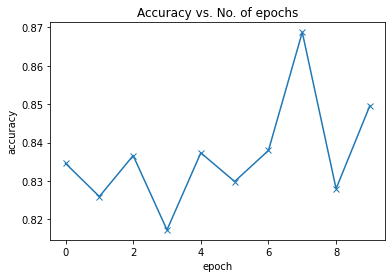

In [210]:
plot_accuracies(history)

In [212]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

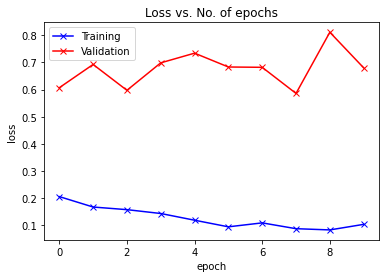

In [213]:
plot_losses(history)

In [214]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/shubham912sahu/caddy-gestures-course-project


'https://jovian.ai/shubham912sahu/caddy-gestures-course-project'

As seen from the above result we were able to acheive a highest val_accuracy of `86%` in the training which is pretty good for a first try even after scaling down the image.

## Testing with Indivisual Images
Let's see how this works with test images.

In [218]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

Label: four , Predicted: four


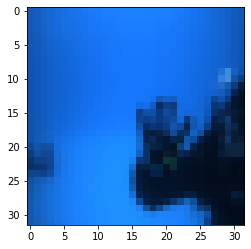

In [219]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', classes[label], ', Predicted:', predict_image(img, model))

Label: photo , Predicted: photo


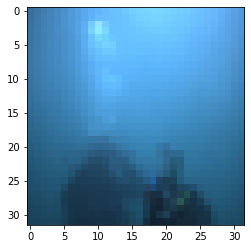

In [221]:
img, label = test_ds[199]
plt.imshow(img.permute(1, 2, 0))
print('Label:', classes[label], ', Predicted:', predict_image(img, model))

Label: boat , Predicted: boat


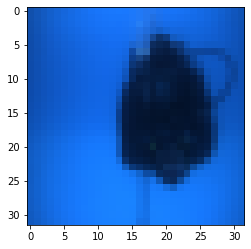

In [222]:
img, label = test_ds[-1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', classes[label], ', Predicted:', predict_image(img, model))

Let's also look at the overall loss and accuracy of the model on the test set

In [224]:
test_loader = DeviceDataLoader(DataLoader(test_ds, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8524970412254333, 'val_loss': 0.7120623588562012}

In [225]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


## Saving and Loading the model
Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [227]:
torch.save(model.state_dict(), './drive/MyDrive/Colab Notebooks/caddy-gesture-cnn.pth')

Testing our model is saved successfully


In [229]:
model2 = to_device(CaddyGesturesCnnModel(), device)

In [230]:
model2.load_state_dict(torch.load('caddy-gesture-cnn.pth'))

<All keys matched successfully>

In [231]:
evaluate(model2, test_loader)

{'val_acc': 0.8524970412254333, 'val_loss': 0.7120623588562012}

Everything works fine let's save!!

In [233]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/shubham912sahu/caddy-gestures-course-project


'https://jovian.ai/shubham912sahu/caddy-gestures-course-project'